In [ ]:
#a
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# load the dataset
titanic_df = pd.read_csv('titanic.csv')

# drop unnecessary columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# fill in missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# convert categorical features
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])


In [ ]:
#b
from sklearn.model_selection import train_test_split

X = titanic_df.drop(['Survived'], axis=1)
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#c
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# define the parameter grid
param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'criterion': ['gini', 'entropy']}

# create the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(tree_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)


Best hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
#d
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# train the decision tree model with the best hyperparameters
tree_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=10, criterion='entropy', random_state=42)
tree_model.fit(X_train, y_train)

# evaluate the performance on the test set
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.8044692737430168
Precision: 0.8305084745762712
Recall: 0.6621621621621622
F1 Score: 0.7368421052631579


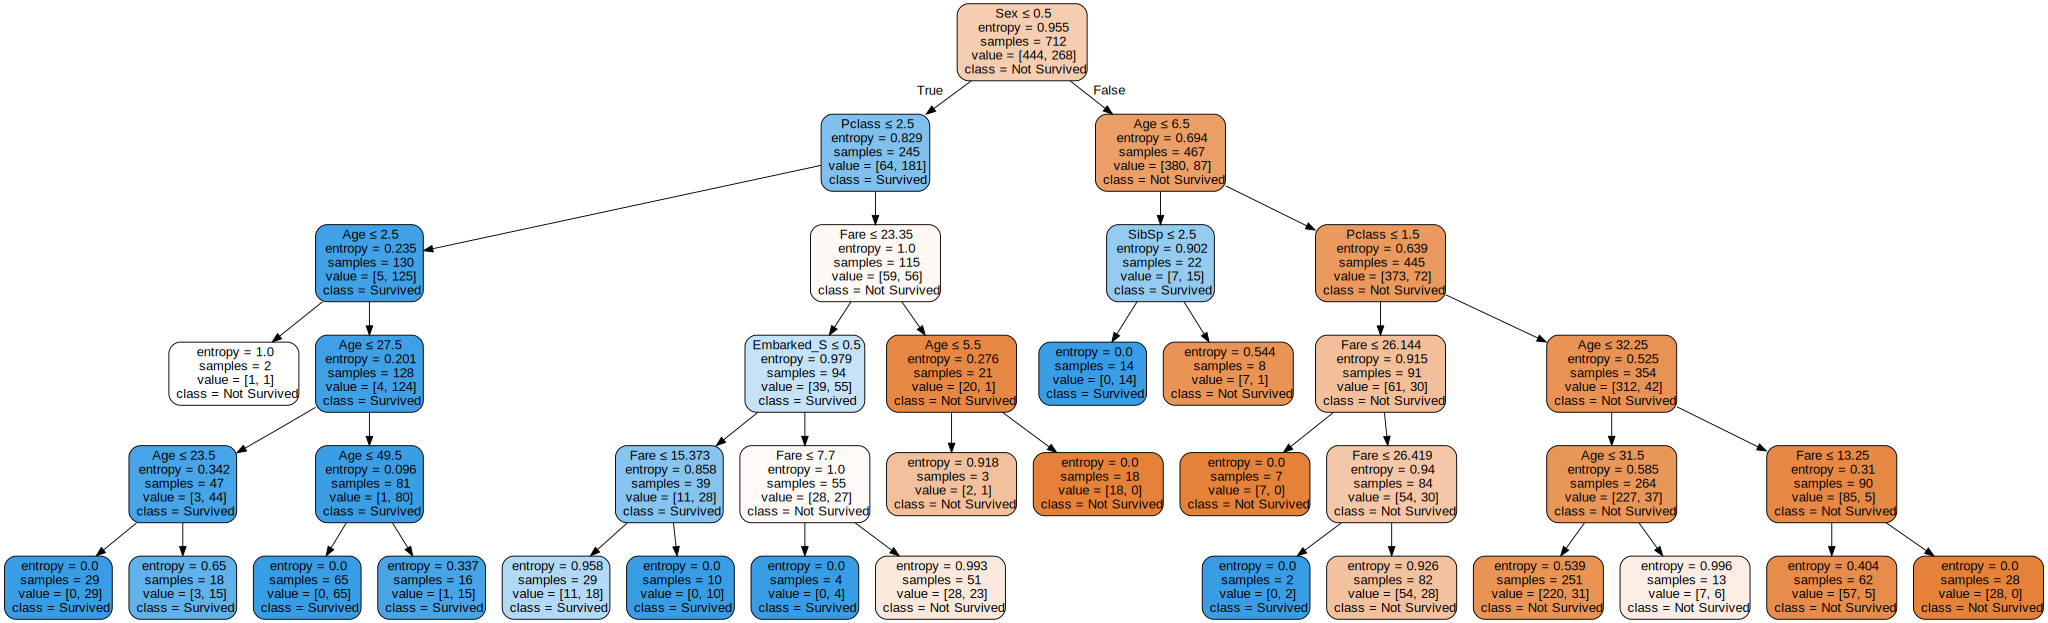

In [ ]:
#e
from sklearn.tree import export_graphviz
import graphviz

# visualize the decision tree
dot_data = export_graphviz(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, special_characters=True)
graphviz.Source(dot_data)


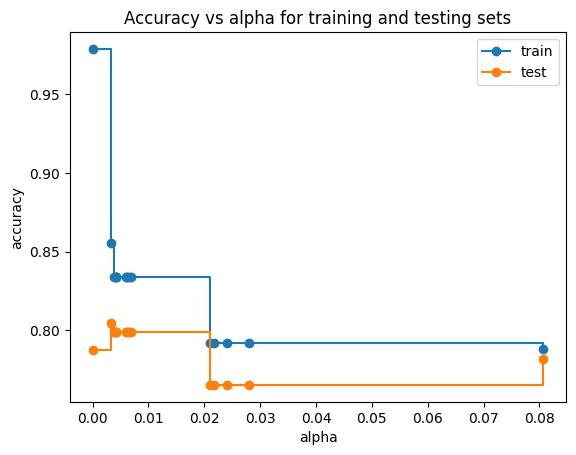

Pruned Decision Tree Performance:
Accuracy: 0.8044692737430168
Precision: 0.8421052631578947
Recall: 0.6486486486486487
F1 Score: 0.7328244274809161


In [ ]:
#f
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np


# find the optimal value of alpha for pruning
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# remove the last classifier, which corresponds to the trivial tree
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# plot the accuracy vs alpha curve for the training and testing sets
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle="steps-post")
ax.legend()
plt.show()

# create the pruned decision tree model with the optimal alpha value
best_clf = clfs[np.argmax(test_scores)]
y_pred_pruned = best_clf.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
precision_pruned = precision_score(y_test, y_pred_pruned)
recall_pruned = recall_score(y_test, y_pred_pruned)
f1_pruned = f1_score(y_test, y_pred_pruned)

print('Pruned Decision Tree Performance:')
print('Accuracy:', accuracy_pruned)
print('Precision:', precision_pruned)
print('Recall:', recall_pruned)
print('F1 Score:', f1_pruned)


Unpruned Decision Tree Performance:
Accuracy: 0.8044692737430168
Precision: 0.8305084745762712
Recall: 0.6621621621621622
F1 Score: 0.7368421052631579


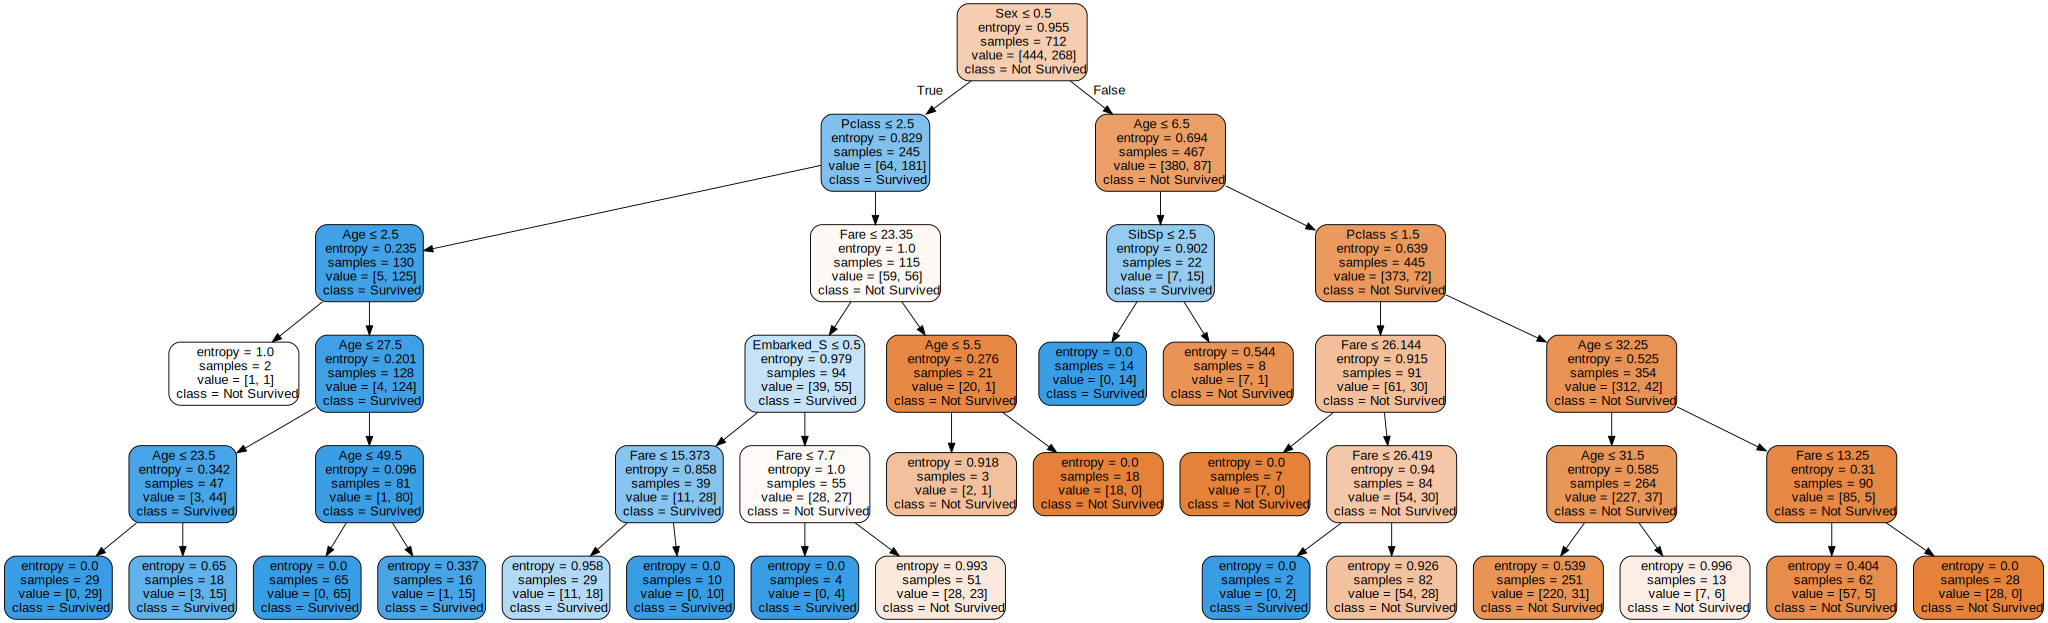

In [ ]:
#g
print('Unpruned Decision Tree Performance:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# visualize the pruned decision tree
dot_data_pruned = export_graphviz(best_clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, special_characters=True)
graphviz.Source(dot_data_pruned)

# visualize the unpruned decision tree
dot_data = export_graphviz(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, special_characters=True)
graphviz.Source(dot_data)
